In [1]:
library(tidyverse)
options(repr.plot.width = 5, repr.plot.height = 4)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# STATS 306
## Homework 6: Importing data

Because midterms are coming up, **this homework is shorter than usual**: it is worth 5 points instead of 10. (Problem 3 is worth up to 2 points extra credit.)

For each problem, enter the R code in the cell marked "YOUR SOLUTION HERE".

## Problem 1: Scraping with `rvest` (3 points)

Use the `rvest` package to answer the following questions.

In [2]:
library(rvest)


Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding




**(a)** [This web page](https://fiscalnote.com/blog/how-old-118th-congress) has a table that records the age of every current U.S. senator. Scrape this table and construct a histogram of the ages (in years) of U.S. senators. *(1 point)*

**HINT:** After reading in the above web page with `read_html()`, one way to scrape the table is to use `html_element("table")` followed by `html_table()`. You may also find these functions useful in parts (b) and (c) below.

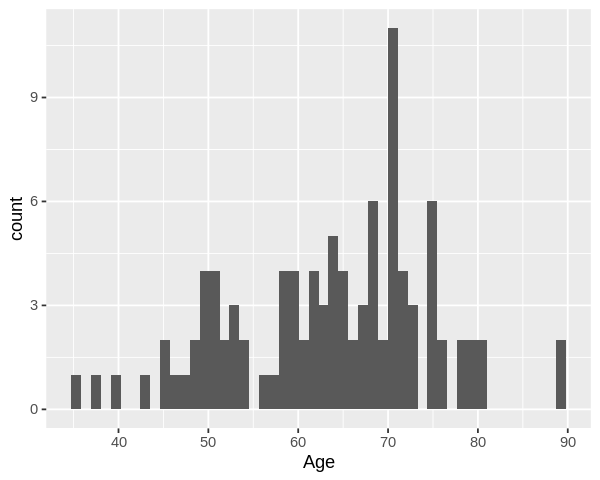

In [3]:
### YOUR SOLUTION HERE
html <- read_html("https://fiscalnote.com/blog/how-old-118th-congress")
html |> html_element("table") |> html_table() |> ggplot(aes(x=Age)) + geom_histogram(bins = 50)

**(b)** The following code chunk creates a table of world cities. This table lists the name, country, latitude, and longitude of each city.

In [ ]:
install.packages("maps")
library(maps)
cities <- world.cities %>%
            rename(country = country.etc) %>%
            mutate(country = replace(country, country == "UK", "England")) %>%
            select(name, country, lat, lon = long)
head(cities)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘maps’


The following object is masked from ‘package:purrr’:

    map




,name,country,lat,lon
,<chr>,<chr>,<dbl>,<dbl>
1,'Abasan al-Jadidah,Palestine,31.31,34.34
2,'Abasan al-Kabirah,Palestine,31.32,34.35
3,'Abdul Hakim,Pakistan,30.55,72.11
4,'Abdullah-as-Salam,Kuwait,29.36,47.98
5,'Abud,Palestine,32.03,35.07
6,'Abwein,Palestine,32.03,35.20


And this next chunk demonstrates how to create a map of Europe that displays some of the cities in `cities`. 

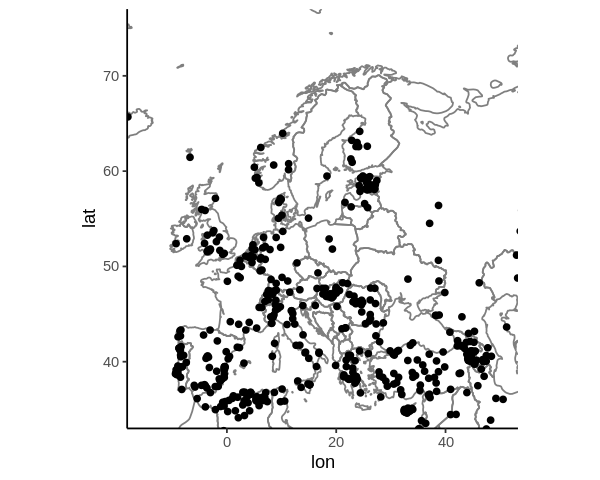

In [ ]:
slice_head(cities, n = 1000) %>%
    ggplot(aes(x = lon, y = lat)) +
        borders("world") +
        geom_point() +
        coord_quickmap(xlim = c(-15, 50), ylim = c(35, 75)) +
        theme_classic()

Here is your task: [This web page](https://www.stadiumguide.com/figures-and-statistics/lists/europes-largest-football-stadiums/) has a table that lists the largest soccer stadiums in Europe in terms of seating capacity. Scrape this table and use it to create a map of Europe that shows the locations of the ten largest European soccer stadiums in terms of seating capacity. *(1 point)*

**HINT:** You should join your scraped table with `cities` by the city and country columns (e.g., `by = c(City = "name", Country = "country")`.

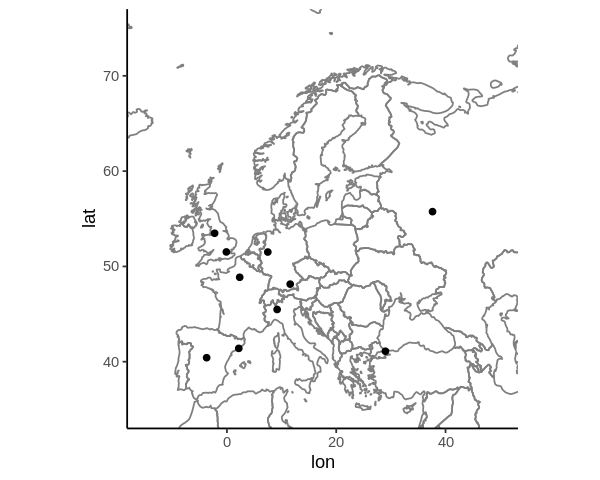

In [ ]:
### YOUR SOLUTION HERE
soccer_stadiums <- read_html("https://www.stadiumguide.com/figures-and-statistics/lists/europes-largest-football-stadiums/")
table_stadiums <- soccer_stadiums |> html_element("table") |> html_table() |> head(10)
left_join(table_stadiums, cities, by = c(City = "name", Country = "country"))  %>%
    ggplot(aes(x = lon, y = lat)) +
        borders("world") +
        geom_point() +
        coord_quickmap(xlim = c(-15, 50), ylim = c(35, 75)) +
        theme_classic()

**(c)** [This web page](https://www.boxofficemojo.com/chart/top_lifetime_gross/?area=XWW) has a table that records information about the highest-grossing films of all time. It lists the title and lifetime gross earnings of each film, as well as the year in which it was made.

Scrape this table and use `geom_col()` to create a chart of the gross earnings (in billions of US dollars) of the 25 highest-grossing films of all time, and color the bars of this chart by decade. *(1 point)*

**HINT 1:** There is a column called Lifetime Gross in the scraped table. To create a new column that drops the $ symbol from Lifetime Gross and changes the scale to billions of US dollars, you can use ``parse_number(`Lifetime Gross`)/1000000000`` inside `mutate()`.

**HINT 2:** You can use `case_when()` inside `mutate()` to create a new variable that records the decade of each film.

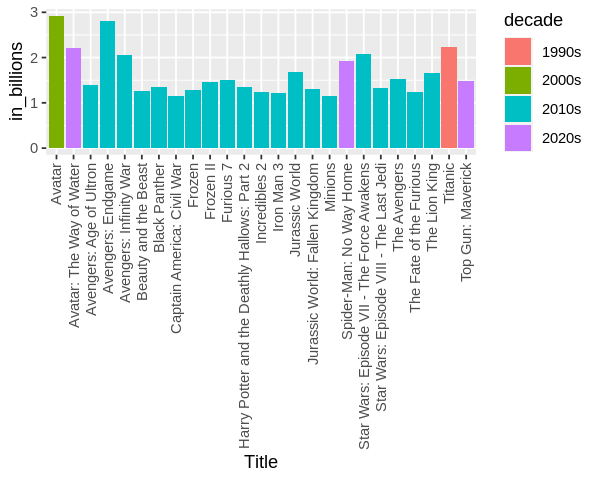

In [ ]:
### YOUR SOLUTION HERE
high_gross <- read_html("https://www.boxofficemojo.com/chart/top_lifetime_gross/?area=XWW")
new_table <- high_gross |> html_element("table") |> html_table() |> mutate(in_billions = parse_number(`Lifetime Gross`)/1000000000) |>
  mutate(decade = case_when(Year > 2019 ~ "2020s",
  Year > 2009 ~ "2010s", Year > 1999 ~ "2000s", Year > 1989 ~ "1990s", Year > 1979 ~ "1980s", Year > 1969 ~ "1970s")) 
new_table %>% filter(Rank < 26) %>% ggplot(aes(x=Title, y=in_billions, fill = decade)) + geom_col() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

## Problem 2: IMDB top 250 (2 points)

The following CSV file contains data on the [top 250 rated movies on IMDB](https://www.imdb.com/chart/top):

In [ ]:
download.file("https://datasets.stats306.org/imdb250.csv", "imdb250.csv")

# Read in imdb250.csv and clean up the movie_year column
imdb250 <- read_csv('imdb250.csv') %>%
                mutate(movie_year = as.numeric(str_replace(movie_year, "l", "1")))
head(imdb250)

Rows: 250 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): movie_name, movie_year, genre, director_name, actors_list
dbl (2): rank, rating

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


rank,movie_name,movie_year,genre,director_name,rating,actors_list
<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>
1,The Shawshank Redemption,1994,"[""Drama""]",Frank Darabont,99.3,"[""Tim Robbins"",""Morgan Freeman"",""Bob Gunton"",""William Sadler"",""Clancy Brown"",""Gil Bellows"",""Mark Rolston"",""James Whitmore"",""Jeffrey DeMunn"",""Larry Brandenburg"",""Neil Giuntoli"",""Brian Libby"",""David Proval"",""Joseph Ragno"",""Jude Ciccolella"",""Paul McCrane"",""Renee Blaine"",""Scott Mann""]"
2,The Godfather,1972,"[""Crime"",""Drama""]",Francis Ford Coppola,9.2,"[""Marlon Brando"",""Al Pacino"",""James Caan"",""Diane Keaton"",""Richard S. Castellano"",""Robert Duvall"",""Sterling Hayden"",""John Marley"",""Richard Conte"",""Al Lettieri"",""Abe Vigoda"",""Talia Shire"",""Gianni Russo"",""John Cazale"",""Rudy Bond"",""Al Martino"",""Morgana King"",""Lenny Montana""]"
3,The Dark Knight,2008,"[""Action"",""Crime"",""Drama""]",Christopher Nolan,9.0,"[""Christian Bale"",""Heath Ledger"",""Aaron Eckhart"",""Michael Caine"",""Maggie Gyllenhaal"",""Gary Oldman"",""Morgan Freeman"",""Monique Gabriela Curnen"",""Ron Dean"",""Cillian Murphy"",""Chin Han"",""Nestor Carbonell"",""Eric Roberts"",""Ritchie Coster"",""Anthony Michael Hall"",""Keith Szarabajka"",""Colin McFarlane"",""Joshua Harto""]"
4,The Godfather: Part II,1974,"[""Crime"",""Drama""]",Francis Ford Coppola,9.0,"[""Al Pacino"",""Robert De Niro"",""Robert Duvall"",""Diane Keaton"",""John Cazale"",""Talia Shire"",""Lee Strasberg"",""Michael V. Gazzo"",""G.D. Spradlin"",""Richard Bright"",""Gastone Moschin"",""Tom Rosqui"",""Bruno Kirby"",""Frank Sivero"",""Francesca De Sapio"",""Morgana King"",""Marianna Hill"",""Leopoldo Trieste""]"
5,12 Angry Men,1957,"[""Crime"",""Drama""]",Sidney Lumet,9.0,"[""Henry Fonda"",""Lee J. Cobb"",""Martin Balsam"",""John Fiedler"",""E.G. Marshall"",""Jack Klugman"",""Edward Binns"",""Jack Warden"",""Joseph Sweeney"",""Ed Begley"",""George Voskovec"",""Robert Webber"",""Rudy Bond"",""Tom Gorman"",""James Kelly"",""Billy Nelson"",""John Savoca"",""Walter Stocker""]"
6,Schindler's List,1993,"[""Biography"",""Drama"",""History""]",Steven Spielberg,9.0,"[""Liam Neeson"",""Ralph Fiennes"",""Ben Kingsley"",""Caroline Goodall"",""Jonathan Sagall"",""Embeth Davidtz"",""Malgorzata Gebel"",""Shmuel Levy"",""Mark Ivanir"",""Béatrice Macola"",""Andrzej Seweryn"",""Friedrich von Thun"",""Krzysztof Luft"",""Harry Nehring"",""Norbert Weisser"",""Adi Nitzan"",""Michael Schneider"",""Miri Fabian""]"


**(a)** The following table displays the six movies in the IMDB top 250 in which Tom Hanks appears as an actor:

Use `dplyr` functions (e.g., `filter()`, `mutate()`, `select()`, `arrange()`) to reproduce this table. Your table should match the above table exactly. *(1 point)*

**HINT 1:** You can use the [`str_detect()` function](https://stringr.tidyverse.org/reference/str_detect.html) to find the rows in which "Tom Hanks" appears in `actors_list`.

**HINT 2:** The movie Forrest Gump is incorrectly listed as Forest Bump in `imdb250`. You will need to fix this in order to match the table exactly.

In [ ]:
### YOUR SOLUTION HERE
tom_hanks <- imdb250 %>% group_by(movie_year, movie_name, rating, actors_list) %>% 
  mutate(tom_movie = ifelse(str_detect(actors_list, "Tom Hanks"), TRUE, FALSE)) %>% filter(tom_movie == TRUE) %>% ungroup() %>%
    select(year = movie_year, title = movie_name, rating) %>% arrange(desc(rating))
tom_hanks$title[tom_hanks$title == "Forest Bump"] <- "Forest Gump"
tom_hanks

year,title,rating
<dbl>,<chr>,<dbl>
1994,Forest Gump,8.8
1998,Saving Private Ryan,8.6
1999,The Green Mile,8.6
1995,Toy Story,8.3
2010,Toy Story 3,8.3
2002,Catch Me If You Can,8.1


**(b)** Create a plot that displays the number of top 250 films from each decade. Would you say there was a "golden age" of cinema (i.e., an era in which comparatively more good films were released)? *(1 point)*

Yes, I would say there was a "golden age" of cinema. The decades from 1990s to 2010s seemed to have a significantly more amount of good films released compared to the other decades.

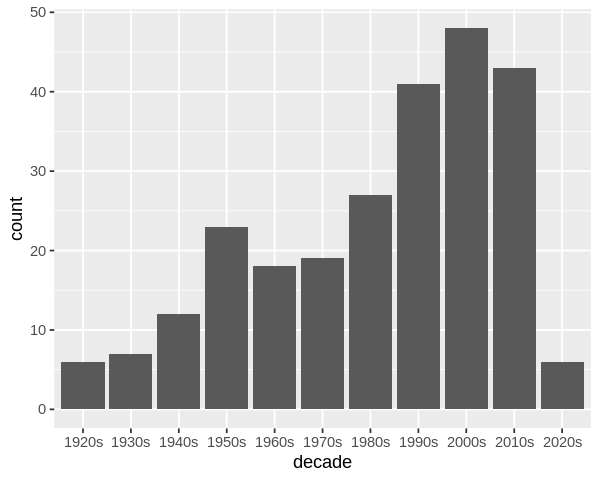

In [ ]:
### YOUR SOLUTION HERE
imdb250 |> mutate(decade = case_when(movie_year > 2019 ~ "2020s",
  movie_year > 2009 ~ "2010s", movie_year > 1999 ~ "2000s", movie_year > 1989 ~ "1990s", movie_year > 1979 ~ "1980s", 
  movie_year > 1969 ~ "1970s", movie_year > 1959 ~ "1960s", movie_year > 1949 ~ "1950s", movie_year > 1939 ~ "1940s",
  movie_year > 1929 ~ "1930s", movie_year > 1919 ~ "1920s", movie_year > 1909 ~ "1910s")) |>
  ggplot(aes(x=decade)) + geom_bar() 

## Problem 3: Extra credit! (2 points)

You can earn up to 2 extra credit points for this problem. There are four parts, and each part is worth 0.5 points of extra credit.

The following spreadsheet contains data from the [Current Population Survey](https://www.census.gov/data/tables/time-series/demo/educational-attainment/cps-historical-time-series.html) on wages by sex and education level in the U.S.:

https://docs.google.com/spreadsheets/d/1N3-Ez5wDVhUgbjy2zsLULrbrYkpVYvDrf-a88-5ED8Q/edit?usp=sharing

You can download the spreadsheet to your local/Colab folder by executing:

In [4]:
download.file("https://datasets.stats306.org/taba-3.xlsx", 'taba-3.xlsx')

As you will see, the data are in a highly non-tidy format. It's your job to tidy them up in order to answer the following questions.

Tidying this dataset is challenging. It's okay to use any strategy that works. For example, you might have to "hardcode" some column names, rather than having R infer them automatically for you. Use whatever techniques you need to answer the questions below, while minimizing the amount of manual data entry you have to perform.

**HINT:** It helps to look at the spreadsheet to understand the data before trying to fix everything in `R`. 

**HINT:** The spreadsheet really contains several different datasets, for example, lines 6-52 is the data for all demographics and sexes, and lines 53-99 contain the data just for males. Rather than loading all of the data at once, consider loading only the data that are necessary for the question at hand. This can be done with the argument `range = "A1:B2"`, where in this case `A-B` would define the column numbers in the spreadsheet that you want to read into `R`, and `1-2` are the rows that you want to read into `R`. 

**HINT:** Consider making a vector of column names that could be used for any dataset from the spreadsheet. Pick the column names so that it's easy to remember what the data are, but also convenient to work with in `dplyr`. This can be done "by hand" or any other way. 

While there are many ways you could try to solve the problem, the last two hints suggest you might want to try something like: 

```
readxl::read_xlsx(
  'taba-3.xlsx',
  range = ____,
  col_names = ____,
  na = 'N'  # HINT: Some missing data are stored as Ns. 
 )
```

**(a)** Across all races and genders, which level of education earns the most money on average? The least? How has this changed over time? Answer these questions by making an appropriate figure. *(0.5 points extra credit)*

Those that earn the most money are those with an advanced degree. Those that earn the least amount of money are those with no high school degree. Overtime, among all levels of education, the average money earned has increased.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




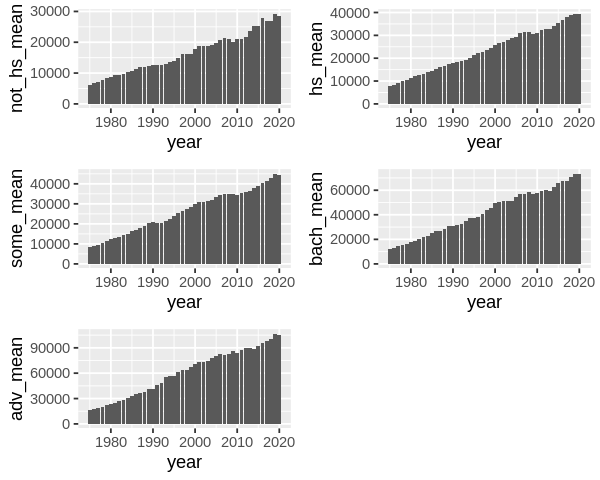

In [5]:
### YOUR SOLUTION HERE
vector_col <- c("year", "tot_with_earn", "tot_mean", "tot_sd", "not_hs_earn", "not_hs_mean", "not_hs_sd", "hs_earn", "hs_mean", "hs_sd",
"some_earn", "some_mean", "some_sd", "bach_earn", "bach_mean", "bach_sd", "adv_earn", "adv_mean", "adv_sd")
everything <- readxl::read_xlsx('taba-3.xlsx', range = "A7:S52", col_names = vector_col)
not_hs <- everything %>% group_by(year, not_hs_mean) %>% 
  ggplot(aes(x = year, y = not_hs_mean)) + geom_col()
hs <- everything %>%  group_by(year, hs_mean) %>% ggplot(aes(x = year, y = hs_mean)) + geom_col()
some <- everything %>% group_by(year, some_mean) %>% ggplot(aes(x = year, y = some_mean)) + geom_col()
bach <- everything %>% group_by(year, bach_mean) %>% ggplot(aes(x = year, y = bach_mean)) + geom_col()
adv <- everything %>% group_by(year, adv_mean) %>% ggplot(aes(x = year, y = adv_mean)) + geom_col()
install.packages("gridExtra")
library(gridExtra)
grid.arrange(not_hs, hs, some, bach, adv)

**(b)** The figure in part (a) should show that average income has generally increased over the years for each education group. One possible explaination is that money is worth less now than it was in the 70s due to inflation. Do you think the increase in wages has resulted in more spending power for each education level, or is it about the same after accounting for inflation? Support your response by creating an appropriate figure. *(0.5 points extra credit)*


**HINT:** You could try to use the average annual inflation to manually adjust annual wages. Because inflation levels change from year to year, a better solution would be to adjust based on the inflation rate for each year. There is an `R` package called `priceR` that helps us do this! Consider installing the package and reading the documentation for the `adjust_for_inflation` function to help adjust for the inflation in the US. 

In [ ]:
### YOUR SOLUTION HERE
mean_df %>% ggplot(aes(x = Year)) +
  geom_line(aes(y = adj_mean, col = Education)) +
  theme_bw() + scale_y_continuous(labels = scales::label_dollar())

**(c)** Use the data from the spreadsheet to produce an appropriate visualization showing how the average wage gap between men and women has changed from 1975 to the present, for all education levels. *(0.5 points extra credit)*

**HINTS:** You will need to use the information from two different sections from the spreadsheet, for example, getting the information from the rows that contain data for females of all demographics, and seperately from the rows that contain information about males. Once you have figured out how to appropriately read data from one of these sections, the other section should be similar. You then can combine the two datasets using `bind_rows`.

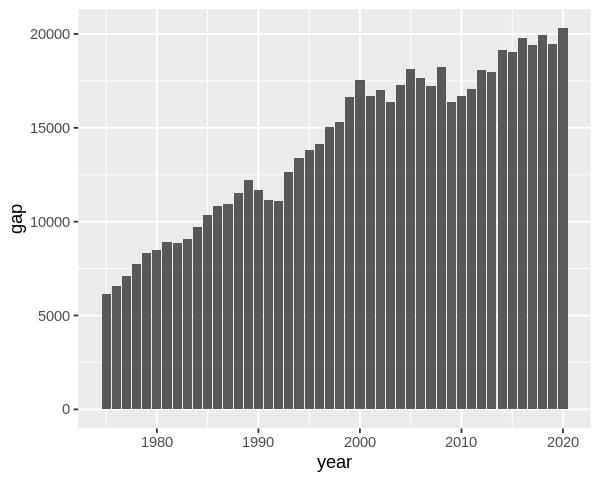

In [8]:
### YOUR SOLUTION HERE
men_new_col <- c("year", "men_tot_with_earn", "men_tot_mean")
women_col <- c("women_total_earn", "women_tot_mean")
men <- readxl::read_xlsx('taba-3.xlsx', range = "A54:C99", col_names = men_new_col)
women <- readxl::read_xlsx('taba-3.xlsx', range = "B101:C146", col_names = women_col)
combined <- bind_cols(men, women)
combined %>% group_by(year) %>% summarize(gap = men_tot_mean - women_tot_mean) %>% ggplot(aes(x = year, y = gap)) + geom_col()

**(d)** Create the same figure from above but this time account for inflation using the same technique used in previous questions. How has the "spending power gap" increased over time? *(0.5 points extra credit)*

In [ ]:
### YOUR SOLUTION HERE
combined %>% ggplot(aes(x = Year, y = adj_gap)) + geom_line() +
  theme_bw() + scale_y_continuous(labels = scales::label_dollar()) +
  facet_wrap(~Education)